# $GROUP$ $36$ $PROJECT$ $PROPOSAL$
### $Predicting$ $Water$ $Levels$ $in$ $Venice$

**INTRODUCTION:**
For our project, we are going to observe a dataset that describes water levels in Venice, Italy. Venice is known for its yearly flooding and is at risk of completely flooding in the future if water levels continue to rise. This dataset contains data from 1983 to 2015, and includes the water level in centimeters for every hour of every day. Our predictive question is:
### “What will the average water level in Venice be ten years from now?” 
We aim to observe possible trends in the average water level per year starting from 1983 and use regression to predict how much the water level will increase or decrease in the future. Since the dataset ends at the year 2015, we want to predict the average yearly water level ten years from that, in 2025. 


**PRELIMINARY DATA ANALYSIS**

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(tidyr)
install.packages("lubridate")
library(lubridate)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




We first loaded in our dataset and noticied the original dataset had some untidy data. This data was untidy because the original dataset had year, month, date, and and time all in one column, so we separated these into different columns with one value per cell. 
We used all the data from the original dataset, and did not need to remove any variables, as the dataset contains all the information we need already; the different water levels and the time at which they were recorded. 

In [4]:
data<-read_csv('https://github.com/lbcommer/venezia-high-waters/raw/master/output/venezia.csv') |>
                                separate(col=datetime, into=c('Year', 'Month', 'Date'), sep='-', convert=TRUE) |>
                                separate(col=Date, into=c('Day', 'Time'), sep=" ", convert=TRUE)

data

Rows: 289272 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): level
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Month,Day,Time,level
<int>,<int>,<int>,<chr>,<dbl>
1983,1,1,01:00:00,44
1983,1,1,02:00:00,35
1983,1,1,03:00:00,23
⋮,⋮,⋮,⋮,⋮
2015,12,31,22:00:00,-5
2015,12,31,23:00:00,8
2016,1,1,00:00:00,20


Initially we wanted to look at just the first day of every month at a specific time, for example; 12 pm of every first day. However, we realized that this does not account for high and low tide periods of each day. Therefore, we changed our method to take the mean water level of the entire day, as this takes into consideration different tides throughout the day. From there we grouped by year and found the mean water level of each year. We also had to remove data for 2016 becuase there was only 1 data point for 2016 while the other years had thousands of data points, which would result in an outlier when plotting mean water level.

In [7]:
set.seed(2000)
filtered_data <- data |>  
filter(Year != "2016") |> group_by(Year,Month) |> summarise(month_average = mean(level))
filtered_data

water_ts <- ts(filtered_data, start=c(1983, 1), end = c(2015, 12), frequency=12) 
water_ts

time_series_df <- as.data.frame(water_ts)
time_series_df

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


Year,Month,month_average
<int>,<int>,<dbl>
1983,1,7.30148
1983,2,19.67262
1983,3,16.70430
⋮,⋮,⋮
2015,10,41.88038
2015,11,32.03889
2015,12,15.00941


,Year,Month,month_average
Jan 1983,1983,1,7.3014805
Feb 1983,1983,2,19.6726190
Mar 1983,1983,3,16.7043011
Apr 1983,1983,4,26.3597222
May 1983,1983,5,28.1491935
Jun 1983,1983,6,16.2902778
Jul 1983,1983,7,19.1868280
Aug 1983,1983,8,19.6438172
Sep 1983,1983,9,21.3958333
Oct 1983,1983,10,18.9838710


Year,Month,month_average
<dbl>,<dbl>,<dbl>
1983,1,7.30148
1983,2,19.67262
1983,3,16.70430
⋮,⋮,⋮
2015,10,41.88038
2015,11,32.03889
2015,12,15.00941


For spliting the data we chose a 80/20 split as we didnt have many data points to start with. We want to predict the yearly average for future years, therefore we split the data after wrangling so the testing and training data were both the same format (yearly average). We then visualized our data using a line plot with points.

In [32]:
# concatenate the 2 columns for year & month and set the date to 01 for being able to use as.Date
time_series_df$year_month <- paste(time_series_df$Year,"-", time_series_df$Month, "-01", sep = "")
time_series_df$year_month <- as.Date(time_series_df$year_month)
time_series_df

# use initial_time_split instead of initial_split since it's time series - not independent of each other
data_split <- initial_time_split(time_series_df, prop = 0.8, strata = Year)
training_data <- training(data_split)
testing_data <- testing(data_split)

training_data
testing_data

Year,Month,month_average,year_month
<dbl>,<dbl>,<dbl>,<date>
1983,1,7.30148,1983-01-01
1983,2,19.67262,1983-02-01
1983,3,16.70430,1983-03-01
⋮,⋮,⋮,⋮
2015,10,41.88038,2015-10-01
2015,11,32.03889,2015-11-01
2015,12,15.00941,2015-12-01


,Year,Month,month_average,year_month
,<dbl>,<dbl>,<dbl>,<date>
1,1983,1,7.30148,1983-01-01
2,1983,2,19.67262,1983-02-01
3,1983,3,16.70430,1983-03-01
⋮,⋮,⋮,⋮,⋮
314,2009,2,37.70833,2009-02-01
315,2009,3,29.54704,2009-03-01
316,2009,4,28.58056,2009-04-01


,Year,Month,month_average,year_month
,<dbl>,<dbl>,<dbl>,<date>
317,2009,5,25.36156,2009-05-01
318,2009,6,37.77361,2009-06-01
319,2009,7,28.35081,2009-07-01
⋮,⋮,⋮,⋮,⋮
394,2015,10,41.88038,2015-10-01
395,2015,11,32.03889,2015-11-01
396,2015,12,15.00941,2015-12-01


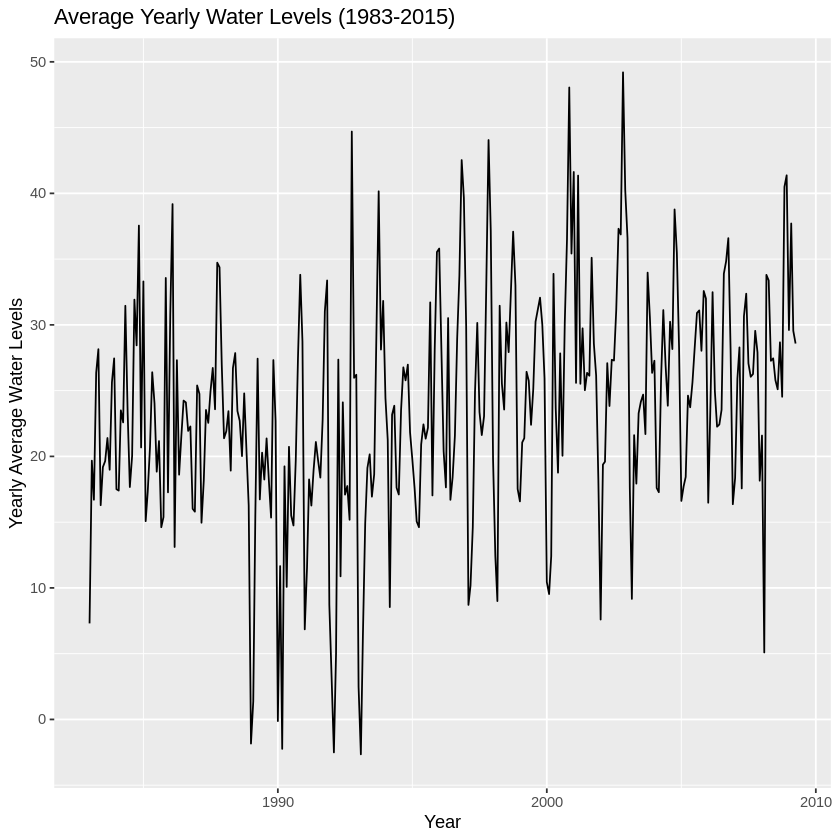

In [34]:
graph_data <- training_data|>
ggplot(aes(x = year_month, y = month_average)) + geom_line() +
labs( x = "Year", y = "Yearly Average Water Levels", title = "Average Yearly Water Levels (1983-2015)")

graph_data

**METHODOLOGY:** 
* We plan on answering our predictive question through using a K-nearest neighbors regression model to create a $regression$ $line$ which will allow us to predict future trends within our data, hence allowing us to answer our predictive question. 
* We will be implementing our regression model onto a $line plot$ which will contain "Year" on the y-axis and "Yearly Average of Water Levels" on the y axis, as well as the regression line will be coloured as it's overlay without color differentiation may cause confusion while interpreting the graph.
* Overall as we have not yet covered chapter 8 (Regression II), therefore are likely additional elements which will be incorporated into this project as our knowledge increases


**EXPECTED OUTCOMES/SIGNIFICANCE:**
From the initial plot of our data that we created after doing preliminary analysis, we can see that the average water levels fluctuate quite frequently between different years. However, there is an overall increasing trend as the years go by, indicating that on a broad level, water levels in Venice are rising as time passes. This aligns with our expected outcome, as we hypothesized in the beginning that water levels would increase. We arrived at this hypothesis because water levels have been rising all around the world due to global warming. The results from our regression prediction will likely reflect this impact that global warming has on the environment. This can lead to more exploratory questions asking what specific factors in Venice are causing the water levels to change.